# DATA GATHERING 

The data for this analysis was gathered from https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset/data.


In [2]:
#libraries imported 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
%matplotlib inline    
pd.set_option('display.max_columns', None)  

# Data Extraction

In [5]:
df = pd.read_csv("shopping_trends.csv")

# Data Exploration and initial Insights

In [7]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [9]:
df.shape

(3900, 19)

In [10]:
df.columns.unique

<bound method Index.unique of Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')>

In [11]:
 #can be binned, retain original column
df.Age.unique() 

array([55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 30, 61, 65, 64, 25, 52,
       66, 31, 56, 18, 38, 54, 33, 36, 35, 29, 70, 69, 67, 20, 39, 42, 68,
       49, 59, 47, 40, 41, 48, 22, 24, 44, 37, 58, 32, 62, 51, 28, 43, 34,
       23, 60])

In [12]:
#can be binned but retain original column
df['Review Rating'].unique() 

array([3.1, 3.5, 2.7, 2.9, 3.2, 2.6, 4.8, 4.1, 4.9, 4.5, 4.7, 2.8, 4.6,
       3.3, 4.4, 3.6, 5. , 4. , 3.7, 4.2, 3.9, 3. , 3.8, 3.4, 4.3, 2.5])

In [13]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [14]:
#should be mapped according to regions, drop original
df.Location.unique() 

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [15]:
df['Payment Method'].unique()

array(['Credit Card', 'Bank Transfer', 'Cash', 'PayPal', 'Venmo',
       'Debit Card'], dtype=object)

In [16]:
df['Preferred Payment Method'].unique() #consistent wiht payment mode, need not be changed 

array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

In [17]:
df['Shipping Type'].unique() 

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

In [18]:
df['Discount Applied'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
df['Promo Code Used'].unique()

array(['Yes', 'No'], dtype=object)

## initial insights  
1. column standardisation
2. Some columns can be clustered/grouped into smaller values
3. there could be many kinds of explorations
     1. product categories and preferences according to age, gender, location, preference 
     2. discount and promo codes -and its impact on purchases and product segments
     3. product segments and purchasing power according to gender and age
     4. delivery preferences according to gender, age and location
     5. payment preferences according to gender and age
     6. subscription preferences according to gender and product categories
        

# Data Cleaning

In [22]:
#drop customer id to reset index
df.duplicated('Customer ID').sum() 

0

In [23]:
df.duplicated().sum() #check for duplicates


0

In [24]:
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [25]:
#resetting index so that it starts at 1 
df.index = np.arange(1, len(df) + 1)

In [26]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [27]:
#creating a duplicate before cleaning

df1 = df.copy() 

In [28]:
## dropping columns 
df1= df1.drop(columns=['Customer ID'], errors='ignore')

#### Feature Engineering - grouping some columns to make visualisation easier 
1. all locations have been grouped by region - north, west, south, east, central
2. all ratings have been categorised as poor, pass, good, and very good
3. frequency of purchases have been corrected to include three monthly into 'quarterly'

In [30]:

# Define region mapping
region_mapping = {
    # Northeast (already defined earlier)
    'Maine': 'Northeast', 'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast',
    'New Hampshire': 'Northeast', 'New York': 'Northeast', 'Vermont': 'Northeast',
    'Connecticut': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',
    'Delaware': 'Northeast', 'Maryland': 'Northeast',

    # Midwest (already defined earlier)
    'Ohio': 'Midwest', 'Michigan': 'Midwest', 'Wisconsin': 'Midwest',
    'Minnesota': 'Midwest', 'Illinois': 'Midwest', 'Indiana': 'Midwest',

    # North (Specific Northern states)
    'North Dakota': 'North', 'South Dakota': 'North', 'Montana': 'North', 'Minnesota': 'North',
    
    # South
    'Alabama': 'South', 'Mississippi': 'South', 'Louisiana': 'South',
    'West Virginia': 'South', 'North Carolina': 'South', 'South Carolina': 'South',
    'Tennessee': 'South', 'Georgia': 'South', 'Florida': 'South', 'Virginia': 'South',
    'Arkansas': 'South',

    # Central
    'Missouri': 'Central', 'Kentucky': 'Central', 'Kansas': 'Central',
    'Nebraska': 'Central', 'Iowa': 'Central',

    # West
    'Montana': 'West', 'Wyoming': 'West', 'Colorado': 'West', 'Idaho': 'West',
    'Washington': 'West', 'Oregon': 'West', 'Nevada': 'West', 'California': 'West',
    'Arizona': 'West', 'Utah': 'West', 'Alaska': 'West', 'Hawaii': 'West',

    # Southwest
    'Texas': 'Southwest', 'Oklahoma': 'Southwest', 'New Mexico': 'Southwest',
}

# Map regions to a new column
df1['Region'] = df1['Location'].map(region_mapping)



In [31]:
df1.Region.unique() #checking to see if all is well 

array(['Central', 'Northeast', 'West', 'South', 'Southwest', 'North',
       'Midwest'], dtype=object)

In [32]:
#age bins
bins = [12, 19, 39, 59, float('inf')]  
labels = ['Teen', 'Adult', 'Middle Age Adult', 'Senior Adult']
df1['Age Category'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=True)
df1.head(2)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Region,Age Category
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,Central,Middle Age Adult
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,Northeast,Teen


In [33]:
df1.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases', 'Region',
       'Age Category'],
      dtype='object')

In [34]:
#bins for ratings

bins = [1, 2, 3, 4, 5]  # Define the edges of the bins
labels = ['Poor', 'Pass', 'Good', 'Very Good']  # Labels for the categories

# Use pd.cut to bin the ratings
df1['Rating Category'] = pd.cut(df1['Review Rating'], bins=bins, labels=labels, right=False)

In [35]:
#correcting values in frequency of purchases

df1['Frequency of purchases'] = df1['Frequency of Purchases'].str.strip()

# Replace 'Every 3 Months' with 'Quarterly'
df1['Frequency of Purchases'] = df1['Frequency of Purchases'].replace('Every 3 Months', 'Quarterly')
df1.head(1)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Region,Age Category,Rating Category,Frequency of purchases
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,Central,Middle Age Adult,Good,Fortnightly


In [36]:
#dropping a column that appeared 
df1 = df1.drop(columns=['Frequency of purchases'])

In [37]:
df1.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases', 'Region',
       'Age Category', 'Rating Category'],
      dtype='object')

In [38]:
df1.rename(columns={
    'Age': 'age',
    'Gender': 'gender',
    'Item Purchased': 'item',
    'Category': 'category',
    'Purchase Amount (USD)': 'purchase_amt_usd',
    'Size': 'size',
    'Color': 'color',
    'Season': 'season',
    'Review Rating': 'review_rating',
    'Subscription Status': 'subscription_status',  # Removed space for better consistency
    'Payment Method': 'payment_method', 
    'Preferred Payment Method': 'preferred_payment_method',# Changed space to underscore
    'Discount Applied':'discount_applied',
    'Promo Code Used':'promo_code_used',
    'Frequency of Purchases':'frequency_of_purchases',
    'Previous Purchases':'previous_purchases',
    'Region':'region',
    'Age Category': 'age_category',
    'Rating Category': 'rating_category',
    'Shipping Type': 'shipping',
    'Previous Purchases': 'previous_purchases'
}, inplace=True)

# Check the renamed columns
print(df1.columns)

Index(['age', 'gender', 'item', 'category', 'purchase_amt_usd', 'Location',
       'size', 'color', 'season', 'review_rating', 'subscription_status',
       'payment_method', 'shipping', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases', 'region', 'age_category', 'rating_category'],
      dtype='object')


In [39]:
#save clean file to csv 
df1.to_excel('clean2_shopping.xlsx')

# Exploratory Data Analysis

In [41]:
import warnings
warnings.filterwarnings('ignore')


In [42]:
#selcting categorical and numerical columns 

cat = df1.select_dtypes(exclude="number")
num = df1.select_dtypes(include="number")

In [43]:
# Being specific - trying to get 
cat_from_num = num.loc[:, num.nunique() < 10] # how does loc work Vs iloc
cat = pd.concat([cat, cat_from_num], axis=1)

num = num.drop(columns=cat_from_num.columns)

In [44]:
cat.columns.unique()

Index(['gender', 'item', 'category', 'Location', 'size', 'color', 'season',
       'subscription_status', 'payment_method', 'shipping', 'discount_applied',
       'promo_code_used', 'preferred_payment_method', 'frequency_of_purchases',
       'region', 'age_category', 'rating_category'],
      dtype='object')

## Univariate Analysis of Numerical categories 

In [46]:
num.describe()

,age,purchase_amt_usd,review_rating,previous_purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


**DECRIPTION OF PURCHASE_AMT_USD**:

1. The dataset contains 3900 observations.
2. The average (mean) of the purchase amount is 59.76.
3. The standard deviation of the purchase amount is 23.68, which indicates how much the values deviate from the mean.
4. The minimum purchase amount is 20.00, and the maximum purchase amount is 100.00.
5. The purchase amount at the 25th percentile is 39.00, meaning 25% of the observations have a purchase amount lower than this value.
6. The median purchase amount (50th percentile) is 60.00, which is the middle value of the dataset.
7. The purchase amount at the 75th percentile is 81.00, meaning 75% of the observations have a purchase amount lower than this value.


 **DECRIPTION OF REVIEW RATING**:

1. The dataset contains 3900 observations.
2. The average (mean) of the rating is 3.74.
3. The standard deviation of ratings is 0.71 which indicates how much the values deviate from the mean.
4. The minimum ratingis 2.5, and the maximum rating is 5.00
5. The rating at the 25th percentile is 3.100, meaning 25% of the observations have a rating lower than this value.
6. The median rating (50th percentile) is 3.70, which is the middle value of the dataset.
7. The rating at the 75th percentile is 4.40, meaning 75% of the observations have a rating lower than this value.


**DECRIPTION OF PREVIOUS PURCHASES**:

1. The dataset contains 3900 observations.
2. The average (mean) of previous purchases is 25.35.
3. The standard deviation of ratings is 14.44 which indicates how much the values deviate from the mean.
4. The min purchases is 1.00, and the maximum number of purchase is 50.00.
5. The number of purchases at the 25th percentile is 13.00, meaning 25% of the observations have a rating lower than this value.
6. The median purchases (50th percentile) are 25.00, which is the middle value of the dataset.
7. The purchases at the 75th percentile is 38.00, meaning 75% of the observations are lower than this value.


**DECRIPTION OF AGE**:

1. The dataset contains 3900 observations.
2. The average (mean) age is 44.06
3. The standard deviation of ratings is 15.20 which indicates how much the values deviate from the mean.
4. The minimum age is 18.00, and the maximum rating is 70.00.
5. The rating at the 25th percentile is 31.00, meaning 25% of the observations have a rating lower than this value.
6. The median rating (50th percentile) is 44.00, which is the middle value of the dataset.
7. The rating at the 75th percentile is 57.00, meaning 75% of the observations have a rating lower than this value.


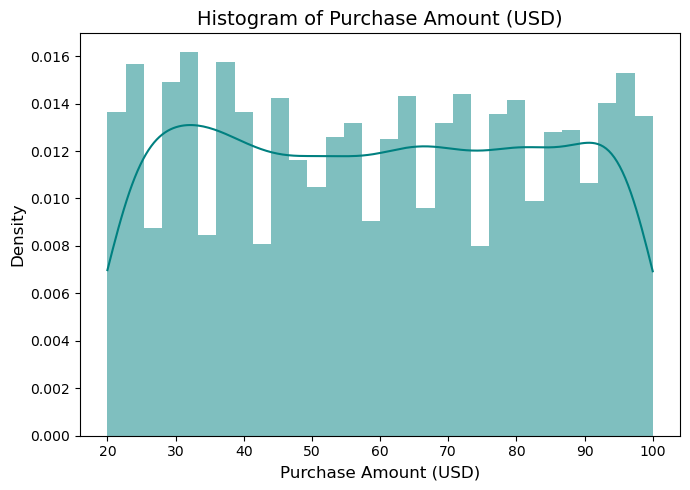

In [51]:
#visualisations of numericals - univariate analysis of purchases amt

plt.figure(figsize=(7, 5))
sns.histplot(num['purchase_amt_usd'], bins=30, kde=True, color='teal', stat='density', linewidth=0)

# Adding title and labels
plt.title('Histogram of Purchase Amount (USD)', fontsize=14)
plt.xlabel('Purchase Amount (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Displaying the plot
plt.tight_layout()
plt.show()

TypeError: text() missing 1 required positional argument: 's'

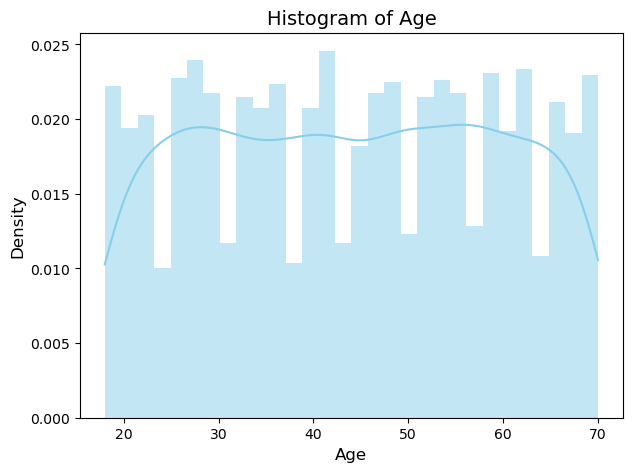

In [52]:
#Plotting the histogram for 'age'
plt.figure(figsize=(7, 5))
sns.histplot(num['age'], bins=30, kde=True, color='skyblue', stat='density', linewidth=0)

# Add title and labels
plt.title('Histogram of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)


# Place the description inside the plot
plt.text(25, 0.025, fontsize=12, color='black', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.8))

# Display the plot
plt.tight_layout()
plt.show()


TypeError: text() missing 1 required positional argument: 's'

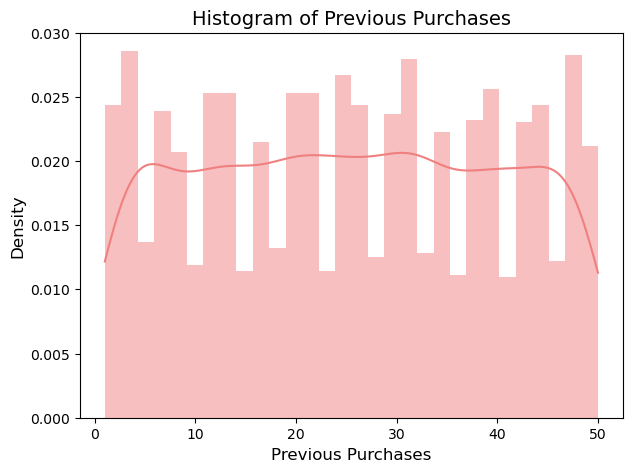

In [67]:
# Plotting the histogram for 'previous_purchases'
plt.figure(figsize=(7, 5))
sns.histplot(num['previous_purchases'], bins=30, kde=True, color='lightcoral', stat='density', linewidth=0)

# Add title and labels
plt.title('Histogram of Previous Purchases', fontsize=14)
plt.xlabel('Previous Purchases', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Place the description inside the plot
plt.text(10, 0.025, fontsize=12, color='black', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.8))

# Display the plot
plt.tight_layout()
plt.show()


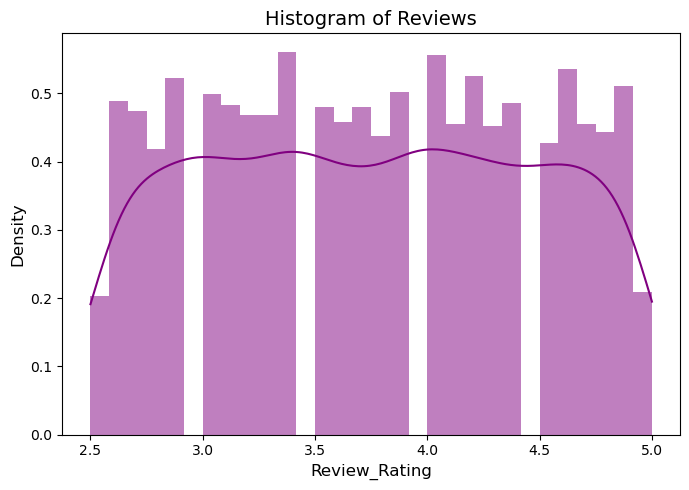

In [69]:
#histogram of review_rating

plt.figure(figsize=(7, 5))
sns.histplot(num['review_rating'], bins=30, kde=True, color='purple', stat='density', linewidth=0)

# Adding title and labels
plt.title('Histogram of Reviews', fontsize=14)
plt.xlabel('Review_Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Displaying the plot
plt.tight_layout()
plt.show()

### Univariate analysis of categorical variables 
####### *each analysis is followed by a visual representation*

### Analysed variables after separation of cat from num 
    1. Season
    2. Product Category
    3. Gender
    4. Age category


In [72]:
#1 Analysis of 'SEASON' with frequency tables for 'season' and visualisation
frequency_table = cat["season"].value_counts()
frequency_table.reset_index()

,season,count
0,Spring,999
1,Fall,975
2,Winter,971
3,Summer,955


In [74]:
proportion_table = cat.season.value_counts(normalize=True)
proportion_table.reset_index()

,season,proportion
0,Spring,0.256154
1,Fall,0.250000
2,Winter,0.248974
3,Summer,0.244872


In [76]:
season_df = pd.concat([frequency_table, proportion_table], axis=1)
season_df.columns = ['absolute_frequency', 'relative_frequency'] #add column headings 
season_df #this is what requires visualisation 

,absolute_frequency,relative_frequency
season,,
Spring,999,0.256154
Fall,975,0.250000
Winter,971,0.248974
Summer,955,0.244872


In [78]:
#a making a total column
total_absolute = frequency_table.sum()  #how to add the total 
total_relative = proportion_table.sum()

In [80]:
# adding total column 
total_row = pd.DataFrame({                                                 
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])
total_row

,absolute_frequency,relative_frequency
Total,3900,1.0


In [82]:
#table with total rows 
season = pd.concat([season_df, total_row])
season

,absolute_frequency,relative_frequency
Spring,999,0.256154
Fall,975,0.250000
Winter,971,0.248974
Summer,955,0.244872
Total,3900,1.000000


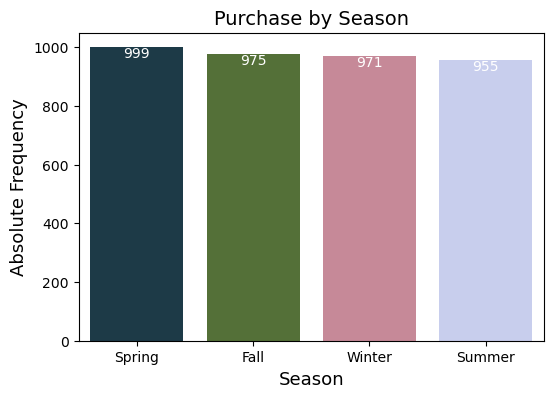

In [84]:
##visualisation of seasonal sales using a bar plot

plt.figure(figsize=(6, 4))  # Adjust the size of the plot
sns.barplot(
    x='season',                           
    y='absolute_frequency',
    data=season_df,                            
    palette='cubehelix',   
)

plt.title('Purchase by Season', fontsize=14)

# want to show exact figures inside the bars
for index, value in enumerate(season_df['absolute_frequency']):
    plt.text(index, value - 35.5,   #adjusting where the figure should be
             str(value), 
             ha='center',  # Horizontal alignment (centered)
             fontsize=10, 
             color='white')

# Add labels to the axes
plt.xlabel('Season', fontsize=13)
plt.ylabel('Absolute Frequency', fontsize=13)

# Display the plot
plt.show()

In [86]:
#Gender univariate analysis
#calculating a gender frequency 

frequency_table = cat["gender"].value_counts()
frequency_table.reset_index()

,gender,count
0,Male,2652
1,Female,1248


In [88]:
proportion_table = cat.gender.value_counts(normalize=True)
proportion_table.reset_index()

,gender,proportion
0,Male,0.68
1,Female,0.32


In [90]:
gender_df=pd.concat([frequency_table, proportion_table], axis=1)
gender_df.columns = ['absolute_frequency', 'relative_frequency']
gender_df

,absolute_frequency,relative_frequency
gender,,
Male,2652,0.68
Female,1248,0.32


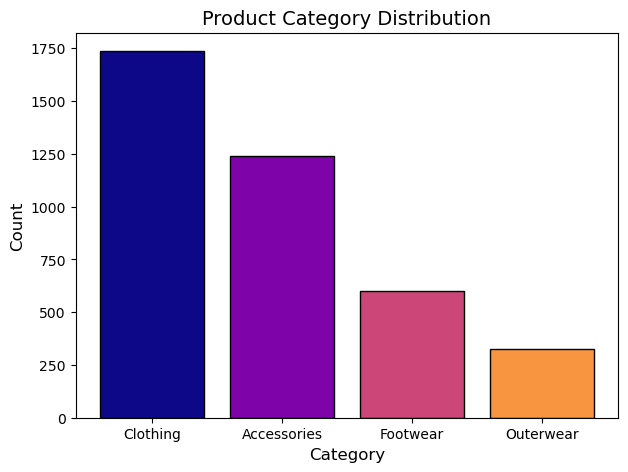

In [91]:
# Product categories frequency table 

frequency_table = cat["category"].value_counts().reset_index()
frequency_table.columns = ["Category", "Frequency"]

#choosing complementary colors from the 'viridis' colormap
cmap = plt.cm.plasma
colors = [cmap(i / len(frequency_table)) for i in range(len(frequency_table))]

# Plotting bar chart
plt.figure(figsize=(7, 5))
plt.bar(frequency_table["Category"], frequency_table["Frequency"], color=colors, edgecolor='black')

# Add labels and title
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Product Category Distribution", fontsize=14)

# Show the plot
plt.show()

In [92]:
## Age category univariate analysis

frequency_table = cat["age_category"].value_counts()
frequency_table.reset_index()

,age_category,count
0,Middle Age Adult,1510
1,Adult,1452
2,Senior Adult,788
3,Teen,150


In [93]:
proportion_table = cat.age_category.value_counts(normalize=True)
proportion_table.reset_index()

,age_category,proportion
0,Middle Age Adult,0.387179
1,Adult,0.372308
2,Senior Adult,0.202051
3,Teen,0.038462


In [94]:
age_cat=pd.concat([frequency_table, proportion_table], axis=1)
age_cat.columns = ['absolute_frequency', 'relative_frequency']
age_cat

,absolute_frequency,relative_frequency
age_category,,
Middle Age Adult,1510,0.387179
Adult,1452,0.372308
Senior Adult,788,0.202051
Teen,150,0.038462


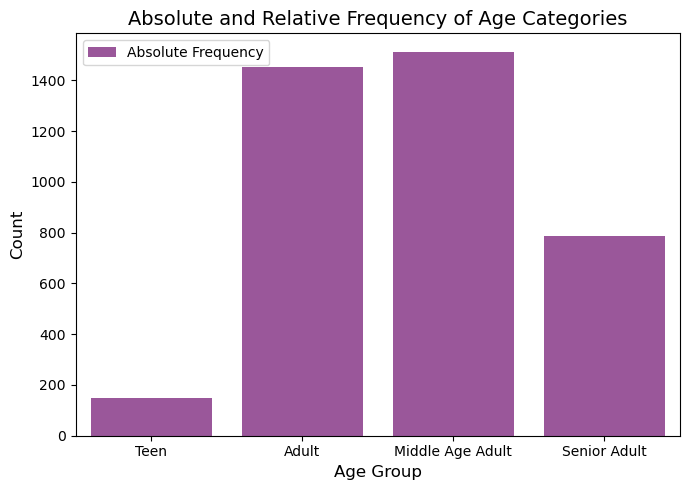

In [95]:
# Plotting the bar chart
plt.figure(figsize=(7, 5))

# Plot absolute frequency
sns.barplot(x=age_cat.index, y=age_cat['absolute_frequency'], color='purple', label='Absolute Frequency', alpha=0.7)

# Add title and labels
plt.title('Absolute and Relative Frequency of Age Categories', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


## Insights from Univariate analysis:

1.The histograms are uniform - indicating no strong correlation
2.They also indicate sales have been uniform through the year.
3.Age investigation reveals that teens spend the least - this could be interesting to investigate further.

# BIVARIATE ANALYSIS
  
    

In [98]:
#1a. gender and frequency of purchases 

pd.crosstab(index=cat.gender, columns='count')

col_0,count
gender,
Female,1248
Male,2652


In [99]:
crosstab_result= pd.crosstab(cat['gender'], cat['frequency_of_purchases'], margins=True, margins_name="Total")
crosstab_result

frequency_of_purchases,Annually,Bi-Weekly,Fortnightly,Monthly,Quarterly,Weekly,Total
gender,,,,,,,
Female,185,188,163,185,355,172,1248
Male,387,359,379,368,792,367,2652
Total,572,547,542,553,1147,539,3900


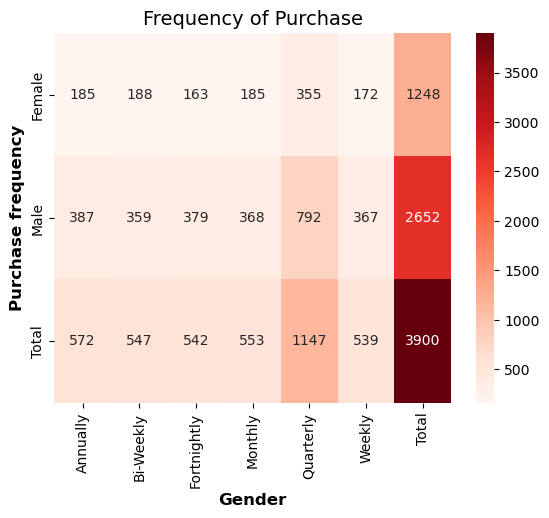

In [100]:
#visualisation
sns.heatmap(crosstab_result, annot=True, cmap="Reds", fmt="d")

plt.xlabel("Gender", fontsize = 12, fontweight ='bold')  
plt.ylabel("Purchase frequency", fontsize = 12, fontweight ='bold')  
plt.title("Frequency of Purchase",fontsize = 14)  

plt.show()

###Insights: 
* The heatmap color intensity shows the frequency count of purchases for each factor of the variable gender.
* The darker shades in the quarterly and male gender reiterate the high number of purchases made by men quarterly in this area.



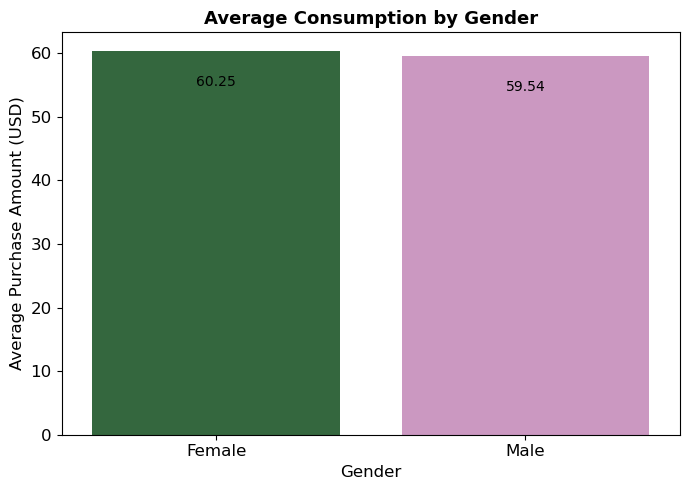

In [102]:
#1b. Gender and Average Purchase trends

# mean purchase amount for each gender
mean_purchase_by_gender = df1.groupby('gender')['purchase_amt_usd'].mean().reset_index()

# Bar plot 
plt.figure(figsize=(7, 5))
sns.barplot(data=mean_purchase_by_gender, x='gender', y='purchase_amt_usd', palette='cubehelix')

# Annotate bars with the average purchase amounts
for index, row in mean_purchase_by_gender.iterrows():
    plt.text(index, row['purchase_amt_usd'] -5.5, f"{row['purchase_amt_usd']:.2f}", ha='center', fontsize=10)

# Customize plot
plt.title('Average Consumption by Gender', fontsize=13, fontweight ='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()





###insights:
there is not a significant difference between shopping habits between female and male

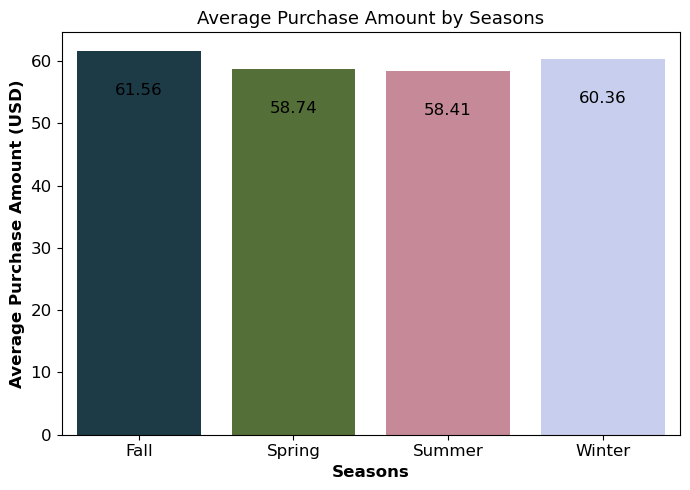

In [104]:
#season and sales

mean_purchase_by_season = df1.groupby('season')['purchase_amt_usd'].mean().reset_index()

# Bar plot to show average purchase amount by gender
plt.figure(figsize=(7, 5))
sns.barplot(data=mean_purchase_by_season, x='season', y='purchase_amt_usd', palette='cubehelix')

# Annotate bars with the average purchase amounts
for index, row in mean_purchase_by_season.iterrows():
    plt.text(index, row['purchase_amt_usd'] -7, f"{row['purchase_amt_usd']:.2f}", ha='center', fontsize=12)

# Customize plot
plt.title('Average Purchase Amount by Seasons', fontsize=13)
plt.xlabel('Seasons', fontsize=12, fontweight ='bold')
plt.ylabel('Average Purchase Amount (USD)', fontsize=12, fontweight ='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [105]:
#2. category and sales/income

#creating differnet dfs for different categories of products
clothing_df=df1.loc[cat['category']=='Clothing']
accessories_df = df1.loc[cat['category']=='Accessories']
footwear_df = df1.loc[cat['category'] =='Footwear']
outerwear_df= df1.loc[cat['category'] =='Outerwear']


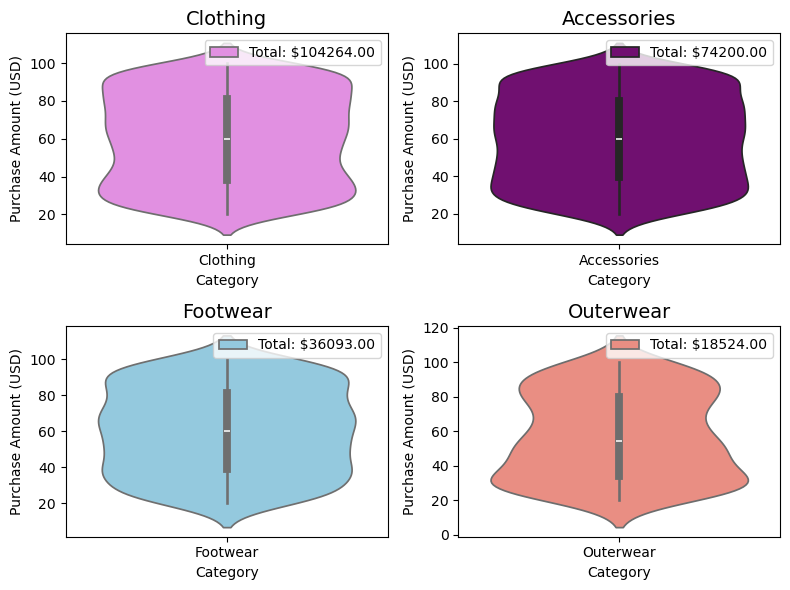

In [106]:
#creating four difference violin plots to calculate popularity and income from each category

total_clothing = clothing_df['purchase_amt_usd'].sum()
total_accessories = accessories_df['purchase_amt_usd'].sum()
total_footwear = footwear_df['purchase_amt_usd'].sum()
total_outerwear = outerwear_df['purchase_amt_usd'].sum()

# Creating subplots for the four violin plots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))  # 2x2 layout for the plots

# Plot for Clothing
sns.violinplot(ax=axes[0, 0], x='category', y='purchase_amt_usd', data=clothing_df, color='violet')
axes[0, 0].set_title('Clothing', fontsize=14)
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Purchase Amount (USD)')
axes[0, 0].legend([f'Total: ${total_clothing:.2f}'], loc='upper right')

# Plot for Accessories
sns.violinplot(ax=axes[0, 1], x='category', y='purchase_amt_usd', data=accessories_df, color='purple')
axes[0, 1].set_title('Accessories', fontsize=14)
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Purchase Amount (USD)')
axes[0, 1].legend([f'Total: ${total_accessories:.2f}'], loc='upper right')

# Plot for Footwear
sns.violinplot(ax=axes[1, 0], x='category', y='purchase_amt_usd', data=footwear_df, color='skyblue')
axes[1, 0].set_title('Footwear', fontsize=14)
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Purchase Amount (USD)')
axes[1, 0].legend([f'Total: ${total_footwear:.2f}'], loc='upper right')

# Plot for Outerwear
sns.violinplot(ax=axes[1, 1], x='category', y='purchase_amt_usd', data=outerwear_df, color='salmon')
axes[1, 1].set_title('Outerwear', fontsize=14)
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Purchase Amount (USD)')
axes[1, 1].legend([f'Total: ${total_outerwear:.2f}'], loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()


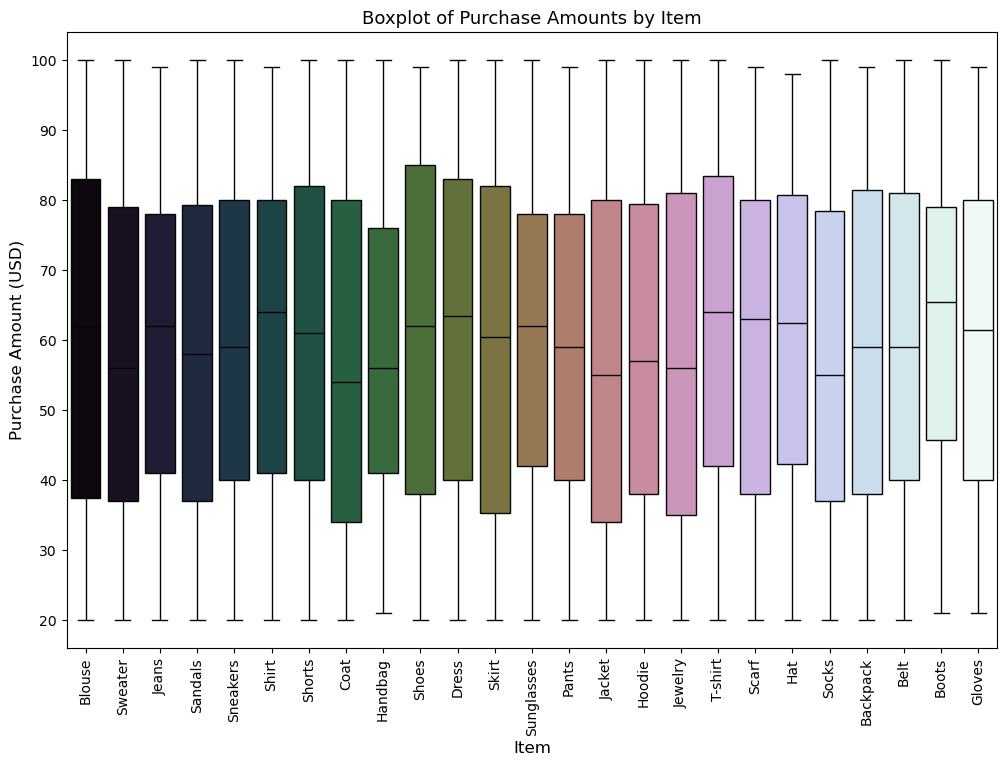

In [107]:
#item and their popularity in sales

plt.figure(figsize=(12, 8))  # Adjust width and height as needed

# Example Boxplot
sns.boxplot(data=df1, x="item", y="purchase_amt_usd", palette="cubehelix")

# Set title and axis labels
plt.title("Boxplot of Purchase Amounts by Item", fontsize=13)
plt.xlabel("Item", fontsize=12)
plt.ylabel("Purchase Amount (USD)", fontsize=12)

# Customize tick labels
plt.xticks(fontsize=10, rotation=90)  # Rotate x-axis labels if needed
plt.yticks(fontsize=10)


# Show the plot
plt.show()



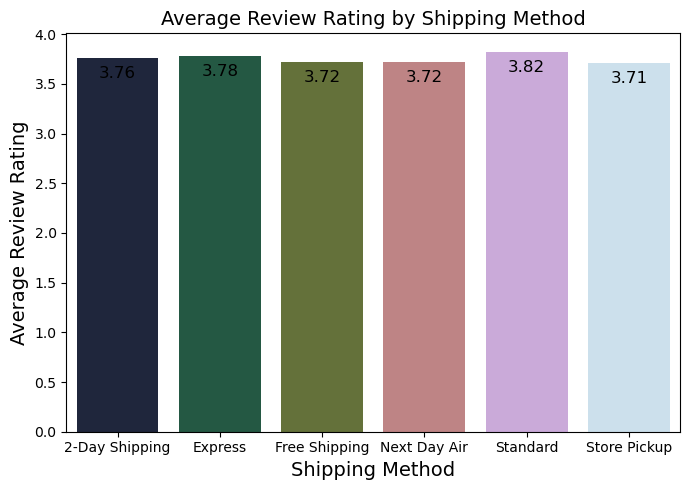

In [108]:
#3. Relationship between ratings and shipping method


mean_ratings = df1.groupby('shipping')['review_rating'].mean().reset_index()

# Bar plot to show mean ratings by shipping method
plt.figure(figsize=(7, 5))
sns.barplot(data=mean_ratings, x='shipping', y='review_rating', palette= 'cubehelix')

# Annotate bars with average ratings
for index, row in mean_ratings.iterrows():
    plt.text(index, row['review_rating'] -0.20, f"{row['review_rating']:.2f}", ha='center', fontsize=12)

# Customize plot
plt.title('Average Review Rating by Shipping Method', fontsize=14)
plt.xlabel('Shipping Method', fontsize=14)
plt.ylabel('Average Review Rating', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


###insights
* in this analysis there is no significant impact of shipping method on rating.
* we can infer that pick up as an option is working
  

## Cat-cat bivariate analysis

cat.columns

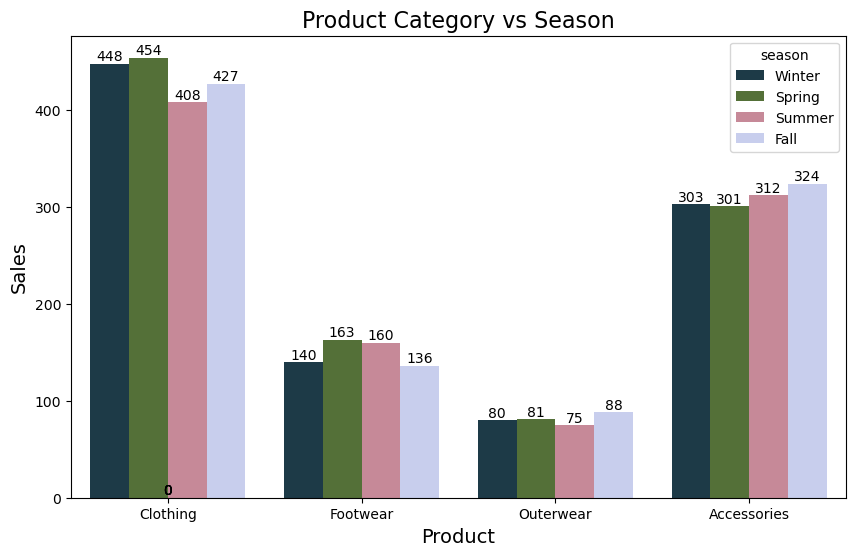

In [111]:
#item sale and season relationship


plt.figure(figsize=(10, 6))

# Plot the countplot for item and season
sns.countplot(data=cat, x='category', hue='season', palette='cubehelix')


#Annotate with numbers for sale (count)
for p in plt.gca().patches:
    # Get the height of each bar
    height = p.get_height()
    # Get the x position of the bar
    x_position = p.get_x() + p.get_width() / 2
    # Annotate the count value on top of the bars
    plt.text(x_position, height + 0.1, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Set title and axis labels
plt.title('Product Category vs Season', fontsize=16)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Show the plot
plt.show()

###insights
* Clothing and footwear registers highest sales in Spring and winter respectively
* Accessories and outerwear register highest sales somehow in autumn - maybe because it is cold


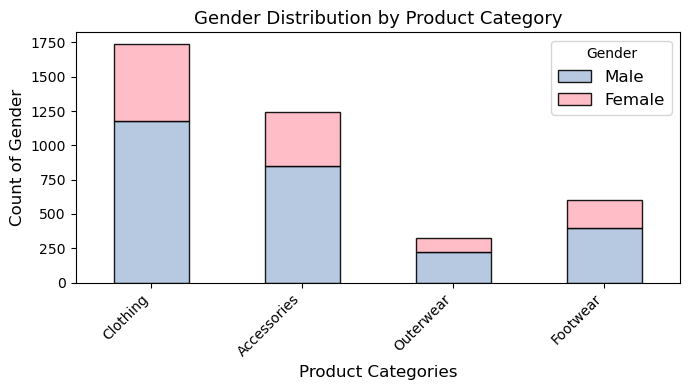

In [113]:
#1. category popularity by gender 


clothing_gender_counts = clothing_df['gender'].value_counts()
accessories_gender_counts = accessories_df['gender'].value_counts()
outerwear_gender_counts = outerwear_df['gender'].value_counts()
footwear_gender_counts = footwear_df['gender'].value_counts()

gender_counts = pd.DataFrame({
    'Clothing': clothing_gender_counts,
    'Accessories': accessories_gender_counts,
    'Outerwear': outerwear_gender_counts,
    'Footwear': footwear_gender_counts
}).fillna(0)  # Fill NaN values with 0 in case some categories are missing gender counts

# Plot a stacked bar chart
ax = gender_counts.T.plot(kind='bar', stacked=True, figsize=(7, 4), color=['#b0c4de', '#ffb6c1'],  # Purple and Blue
    edgecolor='black', 
    alpha=0.9 )

# Customize the plot labels and title
plt.title('Gender Distribution by Product Category', fontsize=13)
plt.xlabel('Product Categories', fontsize=12)
plt.ylabel('Count of Gender', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add a legend to indicate the gender labels
plt.legend(title="Gender", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


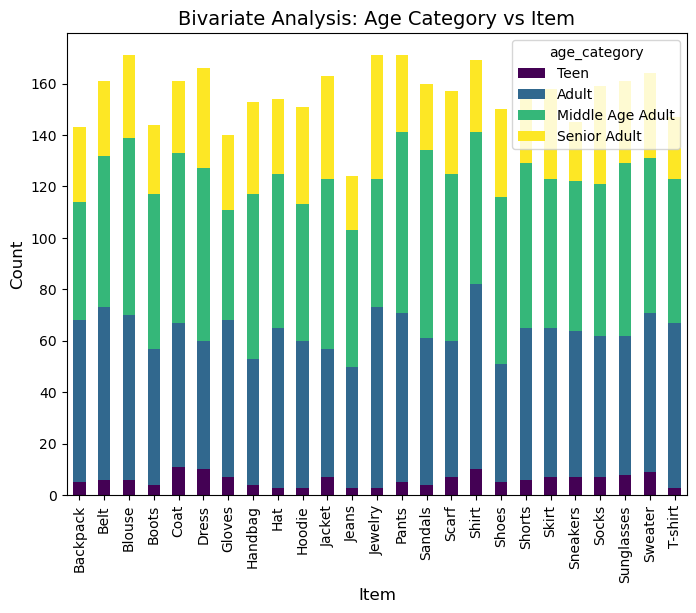

In [114]:
#stacked bar chart for age and item purchase 
#visualise with tableau

# Plot the stacked bar plot for age_category and item
age_item_counts = pd.crosstab(cat['item'], cat['age_category'])
age_item_counts.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')

# Set title and axis labels
plt.title('Bivariate Analysis: Age Category vs Item', fontsize=14)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


###insights: 
include exact numbers in the bars


# UNDERSTANDING THE TEEN DATASET

In [117]:
df1.age_category.unique()

['Middle Age Adult', 'Teen', 'Adult', 'Senior Adult']
Categories (4, object): ['Teen' < 'Adult' < 'Middle Age Adult' < 'Senior Adult']

In [118]:
#UNDERSTANDING TEEN PREFERENCES - REGION BASED AND ITEMS 

# Filter data for teens
teens_data = df1[df1['age_category'] == 'Teen']
teens_data.shape
teens_data['age_category'].value_counts()

age_category
Teen                150
Adult                 0
Middle Age Adult      0
Senior Adult          0
Name: count, dtype: int64

In [119]:
teens_data.isnull().sum()
#review rating is showing null so dealing with rating_category is not |needed 

age                         0
gender                      0
item                        0
category                    0
purchase_amt_usd            0
Location                    0
size                        0
color                       0
season                      0
review_rating               0
subscription_status         0
payment_method              0
shipping                    0
discount_applied            0
promo_code_used             0
previous_purchases          0
preferred_payment_method    0
frequency_of_purchases      0
region                      0
age_category                0
rating_category             4
dtype: int64

In [120]:
# average  amount spent by teens

total_purchase_amt_teens = teens_data['purchase_amt_usd'].sum()

teen_count = teens_data['age_category'].value_counts()

average_amt_per_teen =total_purchase_amt_teens/teen_count

print(f"Average amount spent per Teen: {average_amt_per_teen:}")



Average amount spent per Teen: age_category
Teen                60.533333
Adult                     inf
Middle Age Adult          inf
Senior Adult              inf
Name: count, dtype: float64


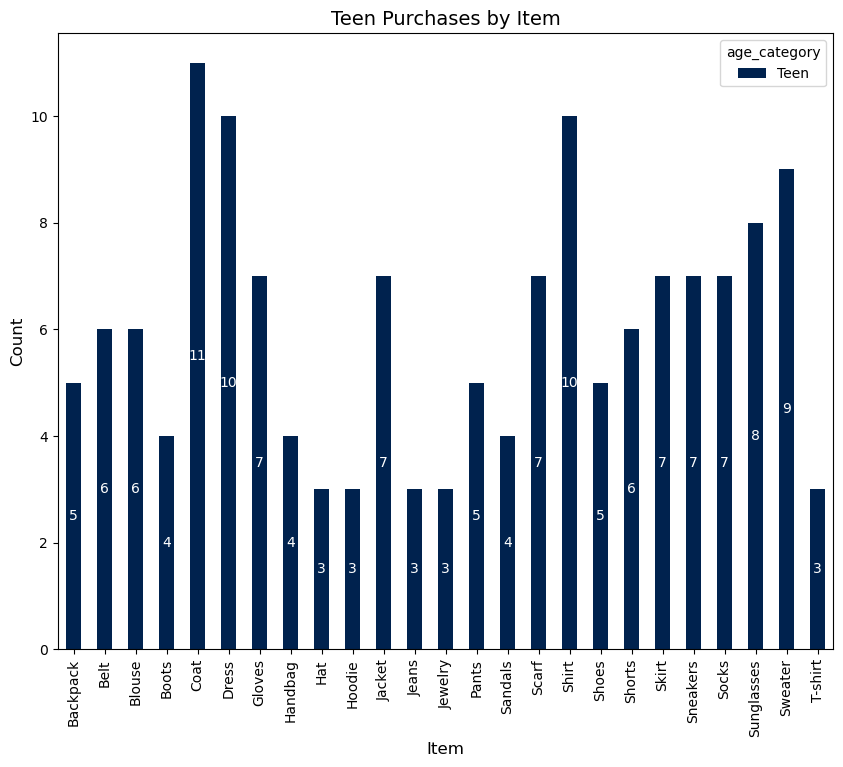

In [121]:

# Create a crosstab for teens and items
teens_item_counts = pd.crosstab(teens_data['item'], teens_data['age_category'])

# Plot a stacked bar chart
ax = teens_item_counts.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='cividis')

# Annotate with exact numbers
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Annotate only non-zero heights
        ax.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2,
                f'{int(height)}', ha='center', va='center', fontsize=10, color='white')

# Add title and labels
plt.title('Teen Purchases by Item', fontsize=14)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


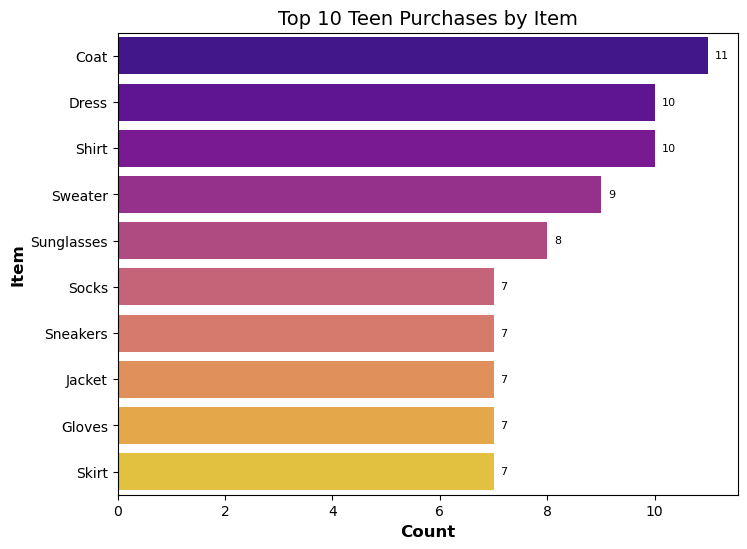

In [122]:
#top ten items

# Count the total number of purchases for each item
item_counts = teens_data['item'].value_counts()

# Select the top 10 items based on their counts
top_10_items = item_counts.nlargest(10)

# Create a horizontal bar plot for the top 10 items
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_10_items.values, y=top_10_items.index, palette='plasma', orient='h')

# Annotate with the exact count for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=8, color='black', 
                xytext=(5, 0), textcoords='offset points')

# Add title and labels
plt.title('Top 10 Teen Purchases by Item', fontsize=14)
plt.xlabel('Count', fontsize=12, fontweight ='bold')
plt.ylabel('Item', fontsize=12, fontweight ='bold')

plt.show()



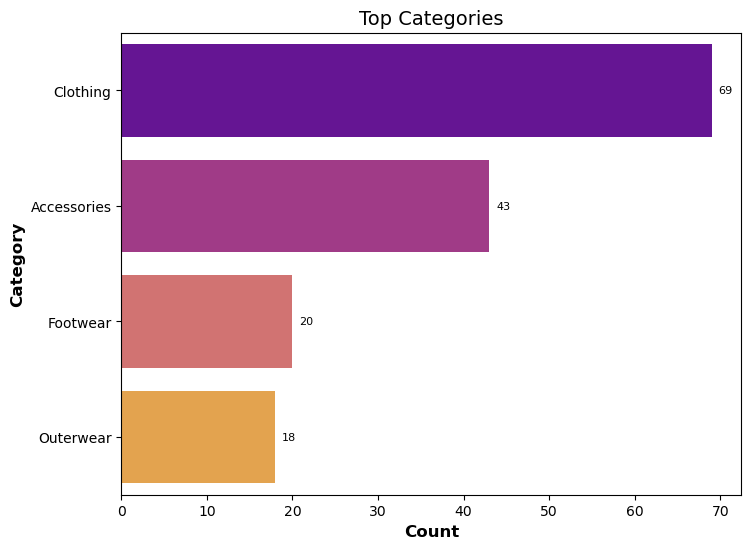

In [123]:
#top ten items

# Count the total number of purchases for each item
cat_counts = teens_data['category'].value_counts()

# Select the top 10 items based on their counts
top_4_categories = cat_counts.nlargest(4)

# Create a horizontal bar plot for the top 10 items
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_4_categories.values, y=top_4_categories.index, palette='plasma', orient='h')

# Annotate with the exact count for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=8, color='black', 
                xytext=(5, 0), textcoords='offset points')

# Add title and labels
plt.title('Top Categories', fontsize=14)
plt.xlabel('Count', fontsize=12, fontweight ='bold')
plt.ylabel('Category', fontsize=12, fontweight ='bold')

plt.show()

In [124]:
# tabular data for seasons and teen purchases

top_10_data = teens_data[teens_data['item'].isin(top_10_items.index)]

# Create a crosstab for the top 10 items and seasons
top_10_item_season_counts = pd.crosstab(top_10_data['item'], top_10_data['season'])

# Display the crosstab table
print(top_10_item_season_counts)

season      Fall  Spring  Summer  Winter
item                                    
Coat           2       2       4       3
Dress          2       1       2       5
Gloves         0       2       1       4
Jacket         3       2       1       1
Shirt          2       1       2       5
Skirt          1       3       1       2
Sneakers       1       3       0       3
Socks          1       2       1       3
Sunglasses     2       2       3       1
Sweater        4       1       1       3


In [125]:
teens_data.columns

Index(['age', 'gender', 'item', 'category', 'purchase_amt_usd', 'Location',
       'size', 'color', 'season', 'review_rating', 'subscription_status',
       'payment_method', 'shipping', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases', 'region', 'age_category', 'rating_category'],
      dtype='object')

In [126]:


# Group by item and color to analyze preferences
item_color_preferences = top_10_data.groupby(['item', 'color']).size().reset_index(name='count')

print (item_color_preferences)

       item      color  count
0      Coat      Beige      2
1      Coat       Blue      1
2      Coat   Charcoal      1
3      Coat       Gold      1
4      Coat      Green      1
..      ...        ...    ...
67  Sweater      Peach      1
68  Sweater     Purple      1
69  Sweater  Turquoise      1
70  Sweater      White      1
71  Sweater     Yellow      1

[72 rows x 3 columns]


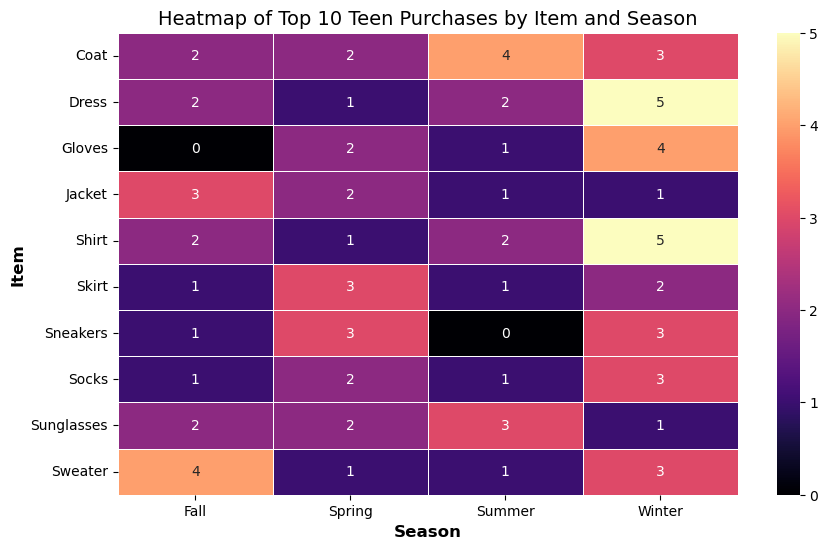

In [127]:
# Filter the data for top 10 items
top_10_data = teens_data[teens_data['item'].isin(top_10_items.index)]

# Create a crosstab for the top 10 items and seasons
top_10_item_season_counts = pd.crosstab(top_10_data['item'], top_10_data['season'])

# Create a heatmap for the crosstab data
plt.figure(figsize=(10, 6))
sns.heatmap(top_10_item_season_counts, annot=True, fmt='d', cmap='magma', cbar=True, linewidths=0.5)

# Add title and labels
plt.title('Heatmap of Top 10 Teen Purchases by Item and Season', fontsize=14)
plt.xlabel('Season', fontsize=12, fontweight ='bold')
plt.ylabel('Item', fontsize=12, fontweight ='bold')

# Show the plot
plt.show()

In [128]:
# Calculate average review ratings for each item
item_rating_summary = teens_data.groupby('item')['review_rating'].mean().reset_index()

# Find the top 5 highest-rated and 5 lowest-rated items
highest_rated_items = item_rating_summary.nlargest(5, 'review_rating')
lowest_rated_items = item_rating_summary.nsmallest(5, 'review_rating')

print("Highest Rated Items:")
print(highest_rated_items)

print("\nLowest Rated Items:")
print(lowest_rated_items)


Highest Rated Items:
          item  review_rating
12     Jewelry       4.733333
7      Handbag       4.375000
24     T-shirt       4.366667
22  Sunglasses       4.187500
13       Pants       4.140000

Lowest Rated Items:
     item  review_rating
11  Jeans       3.133333
5   Dress       3.370000
8     Hat       3.466667
15  Scarf       3.471429
16  Shirt       3.480000


In [129]:
#want to do - clothing colour and guide
#payment preferred, payment mode, and age
#region, category, and gender 
#age, item, gender

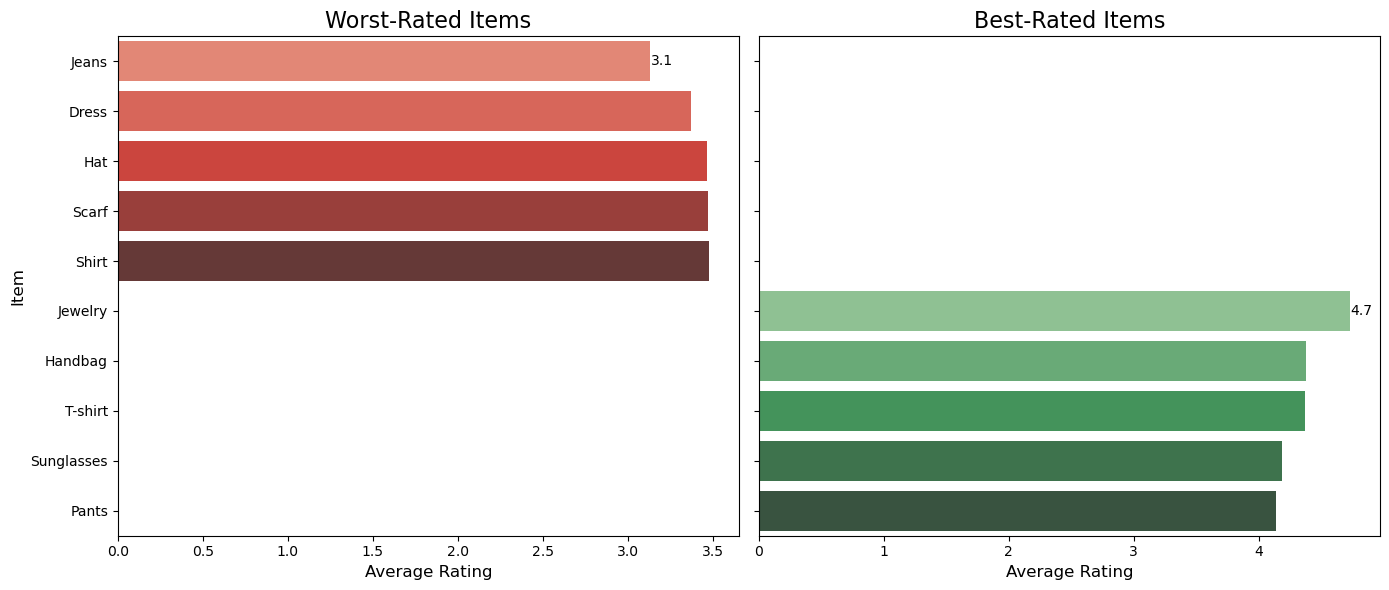

In [130]:

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left plot: Lowest-rated items
sns.barplot(data=lowest_rated_items, x='review_rating', y='item', ax=axes[0], palette='Reds_d')
axes[0].set_title('Worst-Rated Items', fontsize=16)
axes[0].set_xlabel('Average Rating', fontsize=12)
axes[0].set_ylabel('Item', fontsize=12)

# Annotate with exact ratings
for bar in axes[0].containers[0]:
    axes[0].annotate(f'{bar.get_width():.1f}', xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                     ha='left', va='center', fontsize=10, color='black')

# Right plot: Highest-rated items
sns.barplot(data=highest_rated_items, x='review_rating', y='item', ax=axes[1], palette='Greens_d')
axes[1].set_title('Best-Rated Items', fontsize=16)
axes[1].set_xlabel('Average Rating', fontsize=12)
axes[1].set_ylabel('')  # Hide the y-label for symmetry

# Annotate with exact ratings
for bar in axes[1].containers[0]:
    axes[1].annotate(f'{bar.get_width():.1f}', xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                     ha='left', va='center', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()
plt.show()


In [131]:
# Count the number of teens in each region
region_counts = teens_data['region'].value_counts()

print("Teen counts by region:")
print(region_counts)


Teen counts by region:
region
South        37
Northeast    33
West         25
Central      22
Midwest      13
Southwest    10
North        10
Name: count, dtype: int64


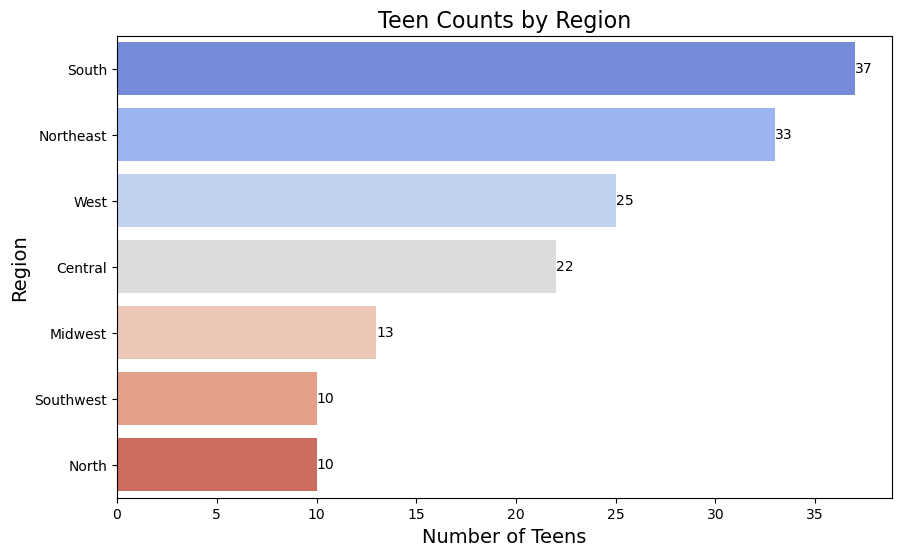

In [132]:

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.values, y=region_counts.index, palette='coolwarm')

# Add title and labels
plt.title('Teen Counts by Region', fontsize=16)
plt.xlabel('Number of Teens', fontsize=14)
plt.ylabel('Region', fontsize=14)

# Annotate with exact numbers
for i, value in enumerate(region_counts.values):
    plt.text(value, i, str(value), va='center', fontsize=10, color='black')

plt.show()


TypeError: add_labels() got an unexpected keyword argument 'color'

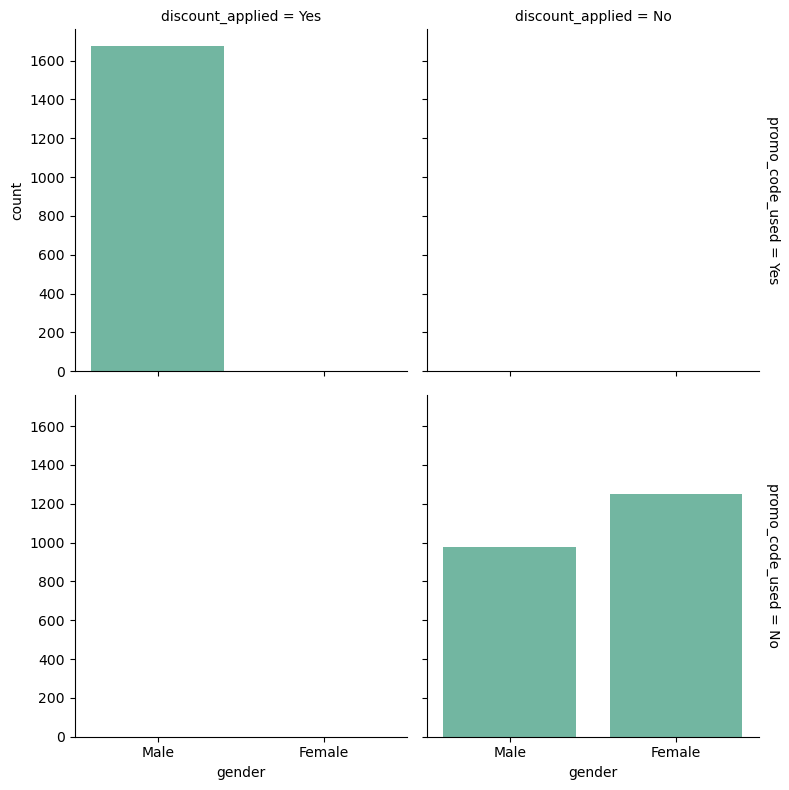

In [133]:
#categoricals only - gender and usage of promo, discounts 

# Create a FacetGrid to visualize Gender distribution across Discount Applied and Promo Code Used
g = sns.FacetGrid(df1, col='discount_applied', row='promo_code_used', hue='gender', height=4, margin_titles=True)

# Map the countplot to the grid
g.map(sns.countplot, 'gender', palette='Set2')

# Add the exact counts on top of the bars
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x() + width / 2
        y = p.get_y() + height
        ax.text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Apply the label function to each axis
g.map(add_labels)

# Customize the plot
g.fig.suptitle('Gender Distribution by Discount Applied and Promo Code Used', fontsize=16)  # Title for the entire grid
g.set_axis_labels('Gender', 'Count')  # Axis labels for all subplots
g.set_titles(col_template="Discount: {col_name}", row_template="Promo Code: {row_name}")  # Titles for each subplot
g.tight_layout()  # Adjust layout for better spacing
g.fig.subplots_adjust(top=0.9)  # Adjust the title position for better spacing

# Show the plot
plt.show()



In [ ]:
#numerical-categorical multivariate 


df_encoded = pd.get_dummies(df1, columns=['region'], drop_first=True)

# Calculate correlation matrixdataplot = sb.heatmap(data.corr(numeric_only=True))

# Displaying heatmap
mp.show()
corr_matrix = df_encoded[['age', 'purchase_amt_usd'] + [col for col in df_encoded.columns if 'region_' in col]].corr()

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap between Age, Purchase Amount and Region', fontsize=14)
plt.show()


In [ ]:
#pearson calculations
df1['purchase_amt_usd'].corr(df1['previous_purchases']) # PEARSON

In [ ]:
df1['purchase_amt_usd'].corr(df1['review_rating']) # PEARSON

In [ ]:
#spearman calculations
df1['purchase_amt_usd'].corr(df1['review_rating'], method ='spearman') # PEARSON

In [ ]:
df1['purchase_amt_usd'].corr(df1['previous_purchases'], method = 'spearman') # PEARSON

**Pearson Correlation**: (0.0080)
**Spearman Correlation**: (0.0083)
Insights:

The Pearson correlation suggests a positive but weak linear relationship between previous purchases and the current purchase amt 

The Spearman correlation also indicates a positive btu very weak or no monotonic relationship between the two variables.  

Essentially they indicate no correlation

In [ ]:
num.corr()["purchase_amt_usd"].sort_values(ascending=False)


In [ ]:
correlation_matrix = num.corr()

In [ ]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(10, 8))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [ ]:
#checking for outliers


def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = num[(num < lower_bound) | (num > upper_bound)]
    
    return outliers

data_series = num['purchase_amt_usd']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
outliers.sum()

#hypothesis: there's a significant difference between purchase amt and age

In [139]:
#ANOVA TESTING
from scipy import stats


# Group the data by age_group
grouped = df1.groupby('age_category')['purchase_amt_usd'].apply(list)

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the result
if p_value < 0.05:
    print("There is a significant difference in purchase amounts among age groups.")
else:
    print("There is no significant difference in purchase amounts among age groups.")



F-statistic: 0.3239766810159134
P-value: 0.8080427681122974
There is no significant difference in purchase amounts among age groups.


In [141]:
# the Kolmogorov-Smirnov (K-S) test 

df1 = np.random.uniform(low=0, high=10, size=1000)


D_statistic, p_value = stats.kstest(df1, 'uniform', args=(0, 10))

print("D-statistic:", D_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: Data does not follow a uniform distribution.")
else:
    print("Fail to reject the null hypothesis: Data follows a uniform distribution.")


D-statistic: 0.02638037687407868
P-value: 0.4815049355048677
Fail to reject the null hypothesis: Data follows a uniform distribution.


Mann-Whitney U Test (for comparing two independent groups)
Purpose: A non-parametric test to compare whether two independent samples come from the same distribution.
Question: are two groups from the same distribution
Null Hypothesis: Yes two groups from the same pop? 
Alternative hypothesis: No they are not.


In [143]:

# Mann-Whitney U Test
group_1 = np.random.uniform(0, 10, 500)
group_2 = np.random.uniform(0, 10, 500)


u_statistic, p_value = stats.mannwhitneyu(group_1, group_2)

print("U-statistic:", u_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: The two groups come from different distributions.")
else:
    print("Fail to reject the null hypothesis: The two groups come from the same distribution.")


U-statistic: 117754.0
P-value: 0.11259954937889337
Fail to reject the null hypothesis: The two groups come from the same distribution.


In [ ]:
teens_data.to_csv('teens_shopping.csv')